<a href="https://colab.research.google.com/github/vishal-khot/Digit-Recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_csv('/content/train.csv.zip')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [ ]:
print(X.shape,y.shape)

(42000, 784) (42000,)


In [ ]:
X = X.reshape((42000,28,28))

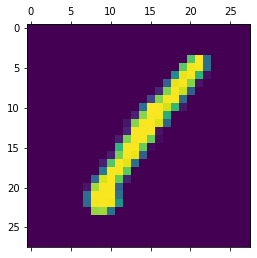

In [ ]:
plt.matshow(X[0])

In [ ]:
y[0]

1

In [ ]:
X = X.reshape((42000,28,28,1))

In [ ]:
X.shape

(42000, 28, 28, 1)

In [ ]:
X = X/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

#Convolutional Neural Network

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1),activation='relu',kernel_size=(5,5),filters=30))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(activation='relu',filters=45,kernel_size=(4,4)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(activation='relu',filters=60,kernel_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,name="RMSprop"),
            metrics=['accuracy'],
            loss='sparse_categorical_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True)

In [ ]:
cnn.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
1247/1247 [==============================] - 38s 30ms/step - loss: 0.3945 - accuracy: 0.8722 - val_loss: 0.0626 - val_accuracy: 0.9781
Epoch 2/25
1247/1247 [==============================] - 37s 30ms/step - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 3/25
1247/1247 [==============================] - 37s 30ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0455 - val_accuracy: 0.9886
Epoch 4/25
1247/1247 [==============================] - 38s 31ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 5/25
1247/1247 [==============================] - 37s 30ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0286 - val_accuracy: 0.9929
Epoch 6/25
1247/1247 [==============================] - 37s 30ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0505 - val_accuracy: 0.9890
Epoch 7/25
1247/1247 [==============================] - 37s 30ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0389 -

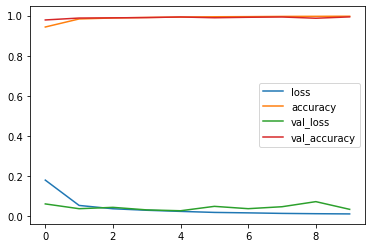

In [ ]:
pd.DataFrame(cnn.history.history).plot()

In [ ]:
predictions = list()
for p in cnn.predict(X_test):
    predictions.append(np.argmax(p))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      0.99      1.00       240
           2       0.99      1.00      0.99       215
           3       1.00      0.98      0.99       184
           4       1.00      1.00      1.00       201
           5       0.97      1.00      0.98       179
           6       1.00      1.00      1.00       222
           7       0.99      1.00      1.00       252
           8       1.00      0.98      0.99       188
           9       0.99      0.99      0.99       212

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [ ]:
testdata = pd.read_csv('/content/test.csv.zip').values

In [ ]:
len(testdata)

28000

In [ ]:
testdata = testdata.reshape(((28000,28,28,1)))

In [ ]:
predictions = list()
for p in cnn.predict(testdata):
    predictions.append(np.argmax(p))

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['ImageId'] = range(1,28001)
submission['Label'] = predictions

In [ ]:
submission.to_csv('submission.csv',index=False)